In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Example dataset
sentences = [
    "I love to eat pizza",
    "She enjoys playing tennis",
    "He is a talented musician",
    "They went for a walk in the park"
]

# Convert sentences into input-output pairs
train_x = []
train_y = []
for sentence in sentences:
    words = sentence.lower().split()
    for i in range(len(words) - 1):
        train_x.append(' '.join(words[:i+1]))
        train_y.append(words[i+1])

# Create a dictionary to map words to unique indices
word_dict = {word: i for i, word in enumerate(set(train_x))}
num_words = len(word_dict)

# Convert sentences to numerical sequences
train_x = np.array([word_dict[word] for word in train_x])
train_y = np.array([word_dict[word] for word in train_y])

# Define the RNN model
model = Sequential()
model.add(Embedding(num_words, 10, input_length=1))
model.add(LSTM(128))
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(train_x, train_y, epochs=100, verbose=0)

# Generate predictions
test_sentence = "I love"
test_input = np.array([word_dict[word] for word in test_sentence.lower().split()])

predicted_index = model.predict_classes(test_input)
predicted_word = next(word for word, index in word_dict.items() if index == predicted_index[0])

print("Input:", test_sentence)
print("Predicted next word:", predicted_word)


KeyError: 'love'

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv("Tesla_stock_data.csv")

In [41]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


splitting the dataset into train and test with 7,3 ratio

In [44]:
length_data=len(df)
split_ratio=0.7
length_train=round(length_data*split_ratio)
length_test=length_data-length_train
print("data length",length_data)
print("training data len",length_train)
print("testing data len",length_test)


data length 1692
training data len 1184
testing data len 508


In [45]:
train_data['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
1179   2015-03-06
1180   2015-03-09
1181   2015-03-10
1182   2015-03-11
1183   2015-03-12
Name: Date, Length: 1184, dtype: datetime64[ns]

converting the training samples in formated date format

In [46]:
train_data=df[:length_train].iloc[:,:2]
train_data['Date']=pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


same with the test data

In [146]:
test_data=df[:length_test].iloc[:,:2]
test_data['Date']=pd.to_datetime(test_data['Date'])
test_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
503,2012-06-26,32.049999
504,2012-06-27,31.900000
505,2012-06-28,31.900000
506,2012-06-29,32.799999


gettign open column as our dataset from train_data 

In [53]:
print(dataset_train.shape)
dataset_train=train_data.Open.values


print(dataset_train[1:5])

(1184,)
[25.790001 25.       23.       20.      ]


converting the column open to 2D 

In [55]:
dataset_train=np.reshape(dataset_train,(-1,1))
print(dataset_train.shape)
print(dataset_train[1:5])

(1184, 1)
[[25.790001]
 [25.      ]
 [23.      ]
 [20.      ]]


Normalize the dataset 

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(dataset_train)
scaled_data.shape

(1184, 1)

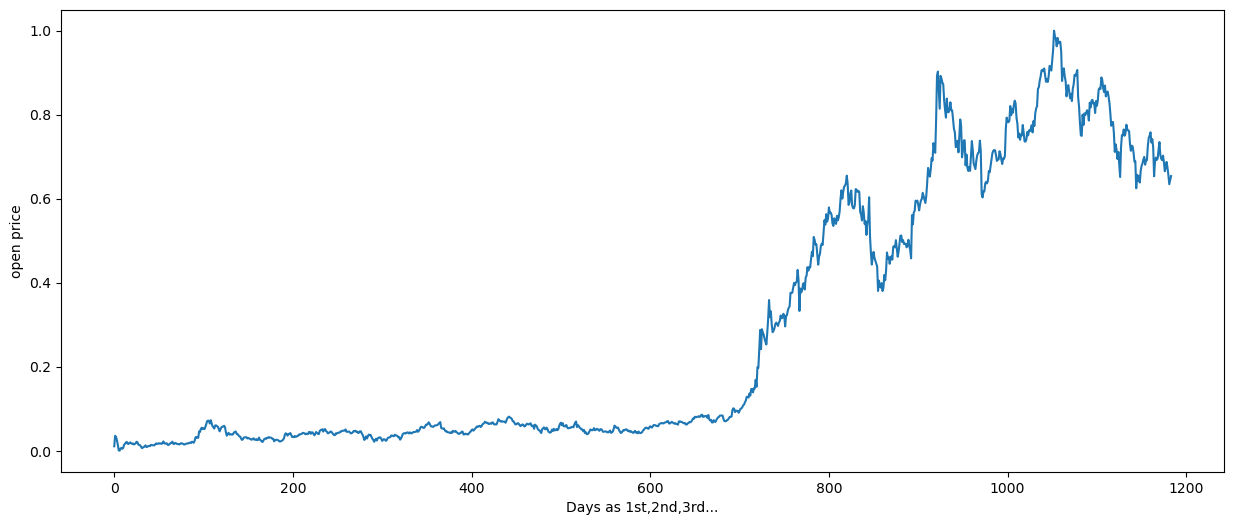

In [64]:
plt.subplots(figsize=(15,6))
plt.plot(scaled_data)
plt.xlabel('Days as 1st,2nd,3rd...')
plt.ylabel('open price')
plt.show()

In [65]:
x_train=[]
y_train=[]
time_step=50
for i in range(time_step,length_train):
    x_train.append(scaled_data[i-time_step:i,0])
    y_train.append(scaled_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)


In [67]:
x_train.shape

(1134, 50)

In [69]:
y_train.shape

(1134,)

Reshape the data to 3D


In [71]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [73]:
x_train.shape

(1134, 50, 1)

In [74]:
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [76]:
y_train.shape

(1134, 1)

In [85]:
x_train[1133].shape

(50, 1)

In [86]:
y_train[0]

array([0.01789858])

Create RNN model 

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [90]:
model=Sequential()
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))



In [98]:
model.compile(optimizer="adam",loss="mse",metrics=['accuracy'])


In [99]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
36/36 [==============================] - 9s 54ms/step - loss: 0.4809 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 2s 55ms/step - loss: 0.2780 - accuracy: 8.8183e-04
Epoch 3/50
36/36 [==============================] - 2s 59ms/step - loss: 0.1623 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 2s 54ms/step - loss: 0.1128 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0724 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0622 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 2s 55ms/step - loss: 0.0518 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0415 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 2s 55ms/step - loss: 0.0433 - accuracy: 0.0000e+00
Epoch 10/50
36/36 [==============================] - 2s 55ms/step - loss:

In [100]:
history.history['loss']

[0.4809081554412842,
 0.2779821455478668,
 0.1622563600540161,
 0.11279529333114624,
 0.07237237691879272,
 0.062185466289520264,
 0.05179756134748459,
 0.041481975466012955,
 0.04327329993247986,
 0.03548114374279976,
 0.030071308836340904,
 0.025311466306447983,
 0.02367577515542507,
 0.02202094905078411,
 0.02027362771332264,
 0.01935535855591297,
 0.020135028287768364,
 0.018048375844955444,
 0.016562100499868393,
 0.01472356729209423,
 0.012046813033521175,
 0.012923161499202251,
 0.012843475677073002,
 0.011138969101011753,
 0.010510697029531002,
 0.009436731226742268,
 0.009480258449912071,
 0.008343147113919258,
 0.007961413823068142,
 0.007658396847546101,
 0.007476127240806818,
 0.006617449223995209,
 0.00696092564612627,
 0.006904630456119776,
 0.005975157488137484,
 0.006009027361869812,
 0.005453125108033419,
 0.006160627119243145,
 0.005728266667574644,
 0.005022784229367971,
 0.00527446111664176,
 0.004384040832519531,
 0.004565089475363493,
 0.004450368694961071,
 0.004

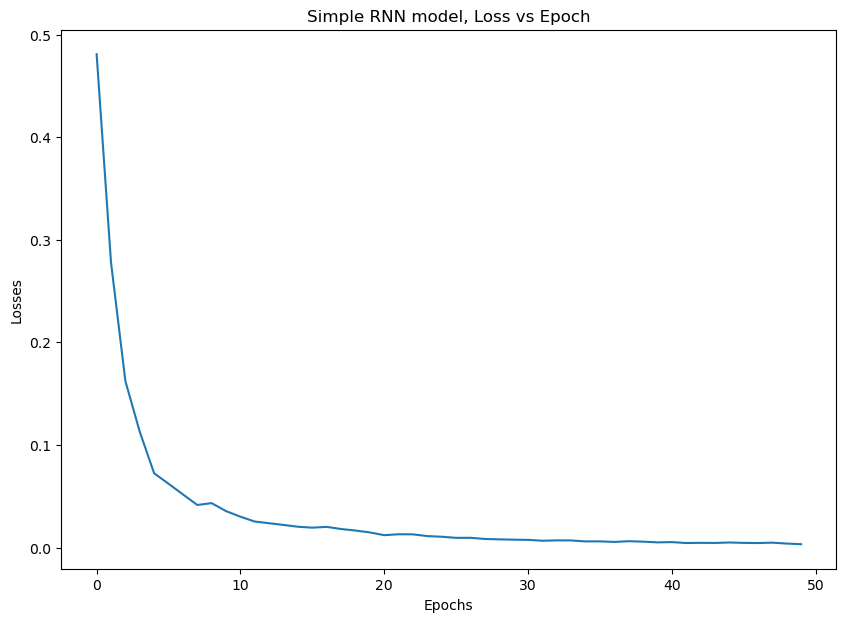

In [101]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

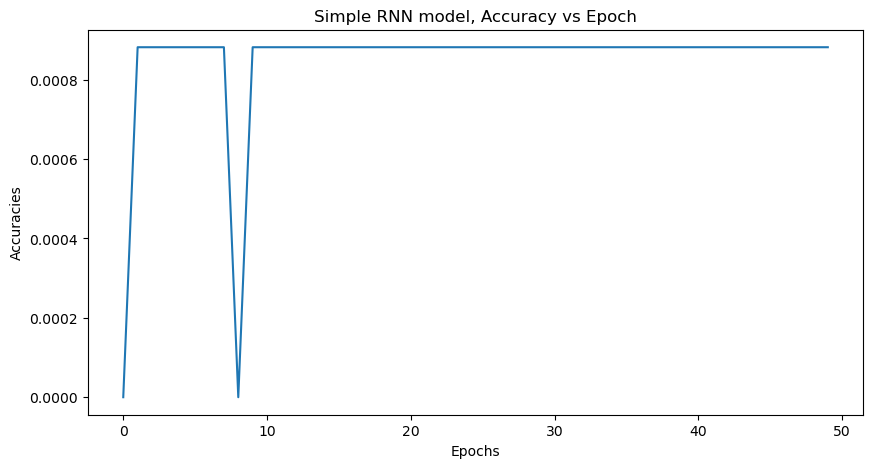

In [102]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

model prediction for train data

In [105]:
y_pred=model.predict(x_train)

36/36 [==============================] - 1s 15ms/step


In [108]:
y_pred

array([[0.02357409],
       [0.0240643 ],
       [0.02432641],
       ...,
       [0.6890734 ],
       [0.67719567],
       [0.66692024]], dtype=float32)

In [109]:
y_pred=scaler.inverse_transform(y_pred)
y_pred

array([[ 22.541073],
       [ 22.67418 ],
       [ 22.745348],
       ...,
       [203.2441  ],
       [200.01894 ],
       [197.22885 ]], dtype=float32)

In [111]:
y_train=scaler.inverse_transform(y_train)
y_train

array([[ 21.      ],
       [ 20.75    ],
       [ 20.889999],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

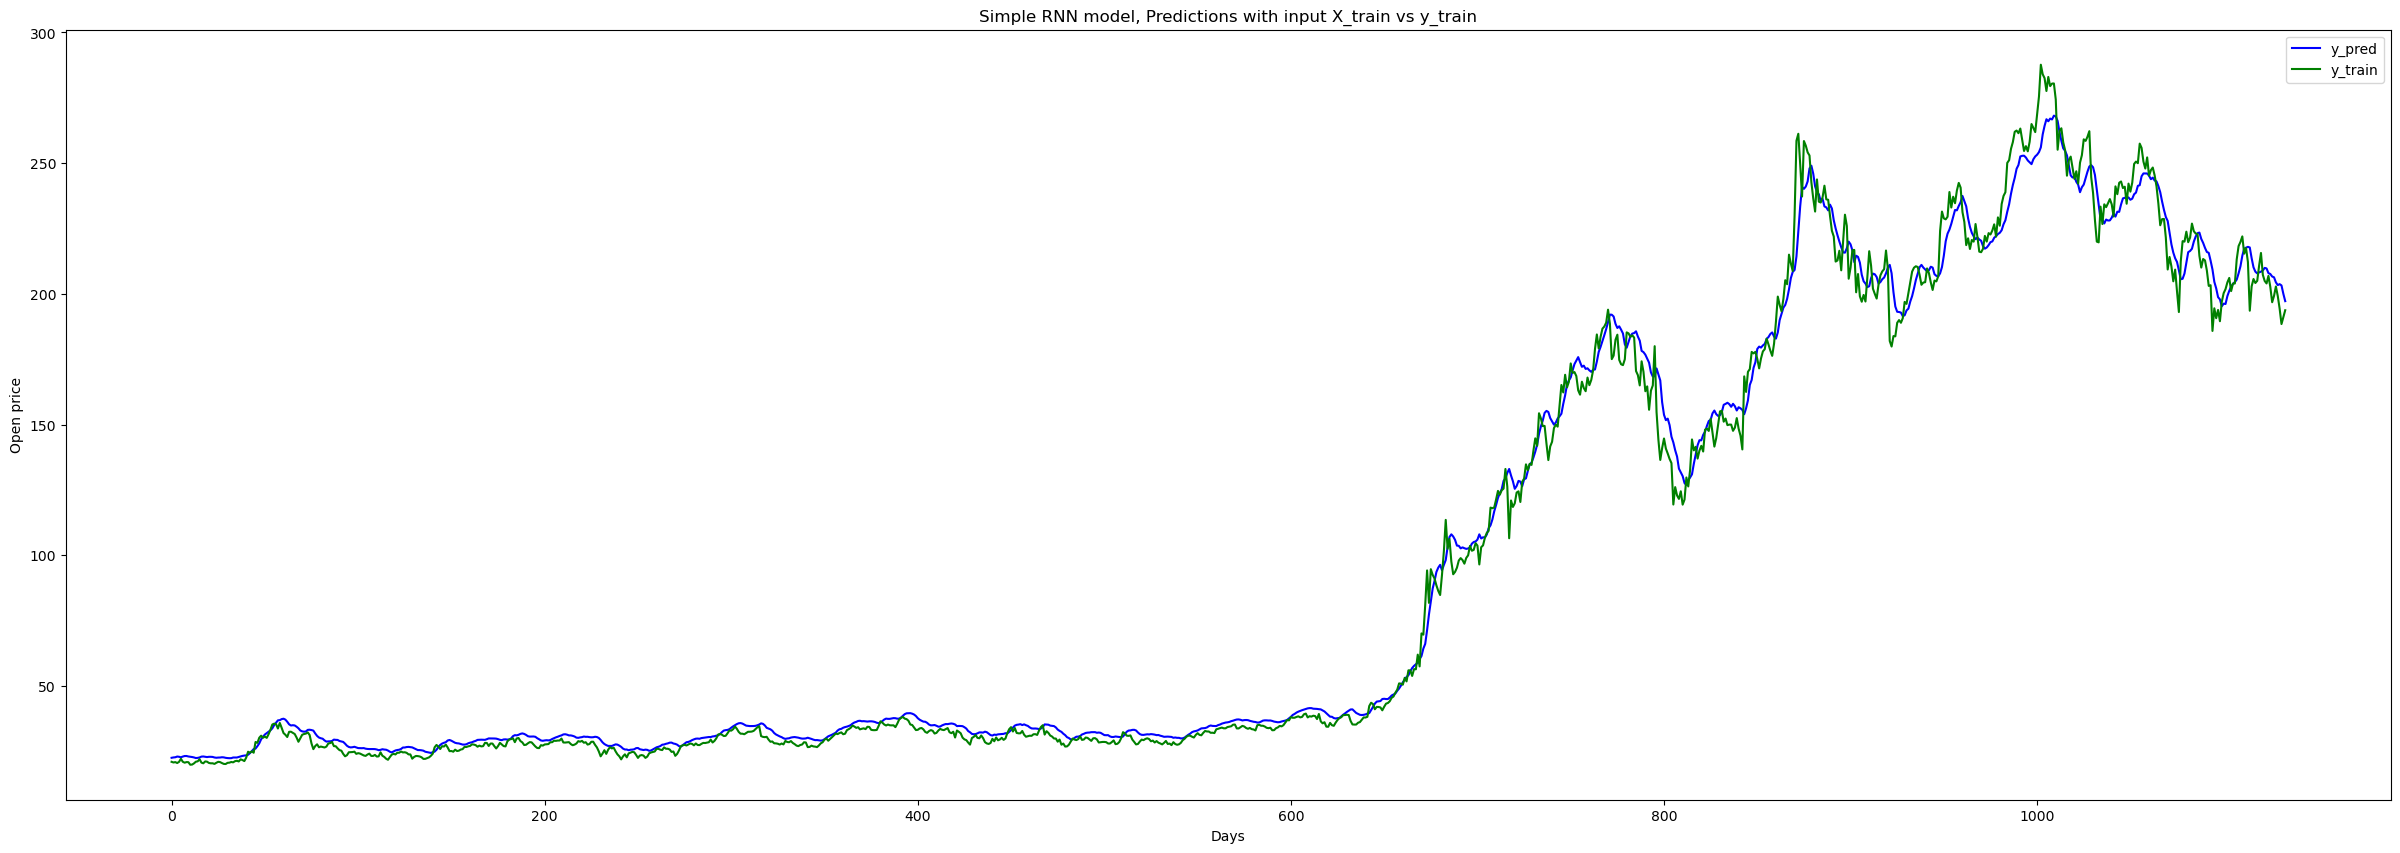

In [112]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

Creating dataset from test data

In [123]:
test_data=test_data.Open.values

In [124]:
test_data=np.reshape(test_data,(-1,1))
scaled_dataset=scaler.fit_transform(test_data)

In [125]:
scaled_dataset.shape

(508, 1)

In [127]:
x_new=[]
y_new=[]
for i in range(time_step,length_test):
    x_new.append(scaled_dataset[i-time_step:i,0])
    y_new.append(scaled_dataset[i,0])
    

In [132]:
x_new,y_new=np.array(x_new),np.array(y_new)

In [133]:
x_new.shape

(458, 50)

In [134]:
y_new.shape

(458,)

In [135]:
x_new=np.reshape(x_new,(x_new.shape[0],x_new.shape[1],1))

In [136]:
x_new.shape

(458, 50, 1)

In [137]:
y_new=np.reshape(y_new,(-1,1))

In [138]:
y_new.shape

(458, 1)

In [139]:
y_pred_of_test=model.predict(x_new)
y_pred_of_test=scaler.inverse_transform(y_pred_of_test)

15/15 [==============================] - 0s 10ms/step


In [141]:
y_pred_of_test.shape

(458, 1)

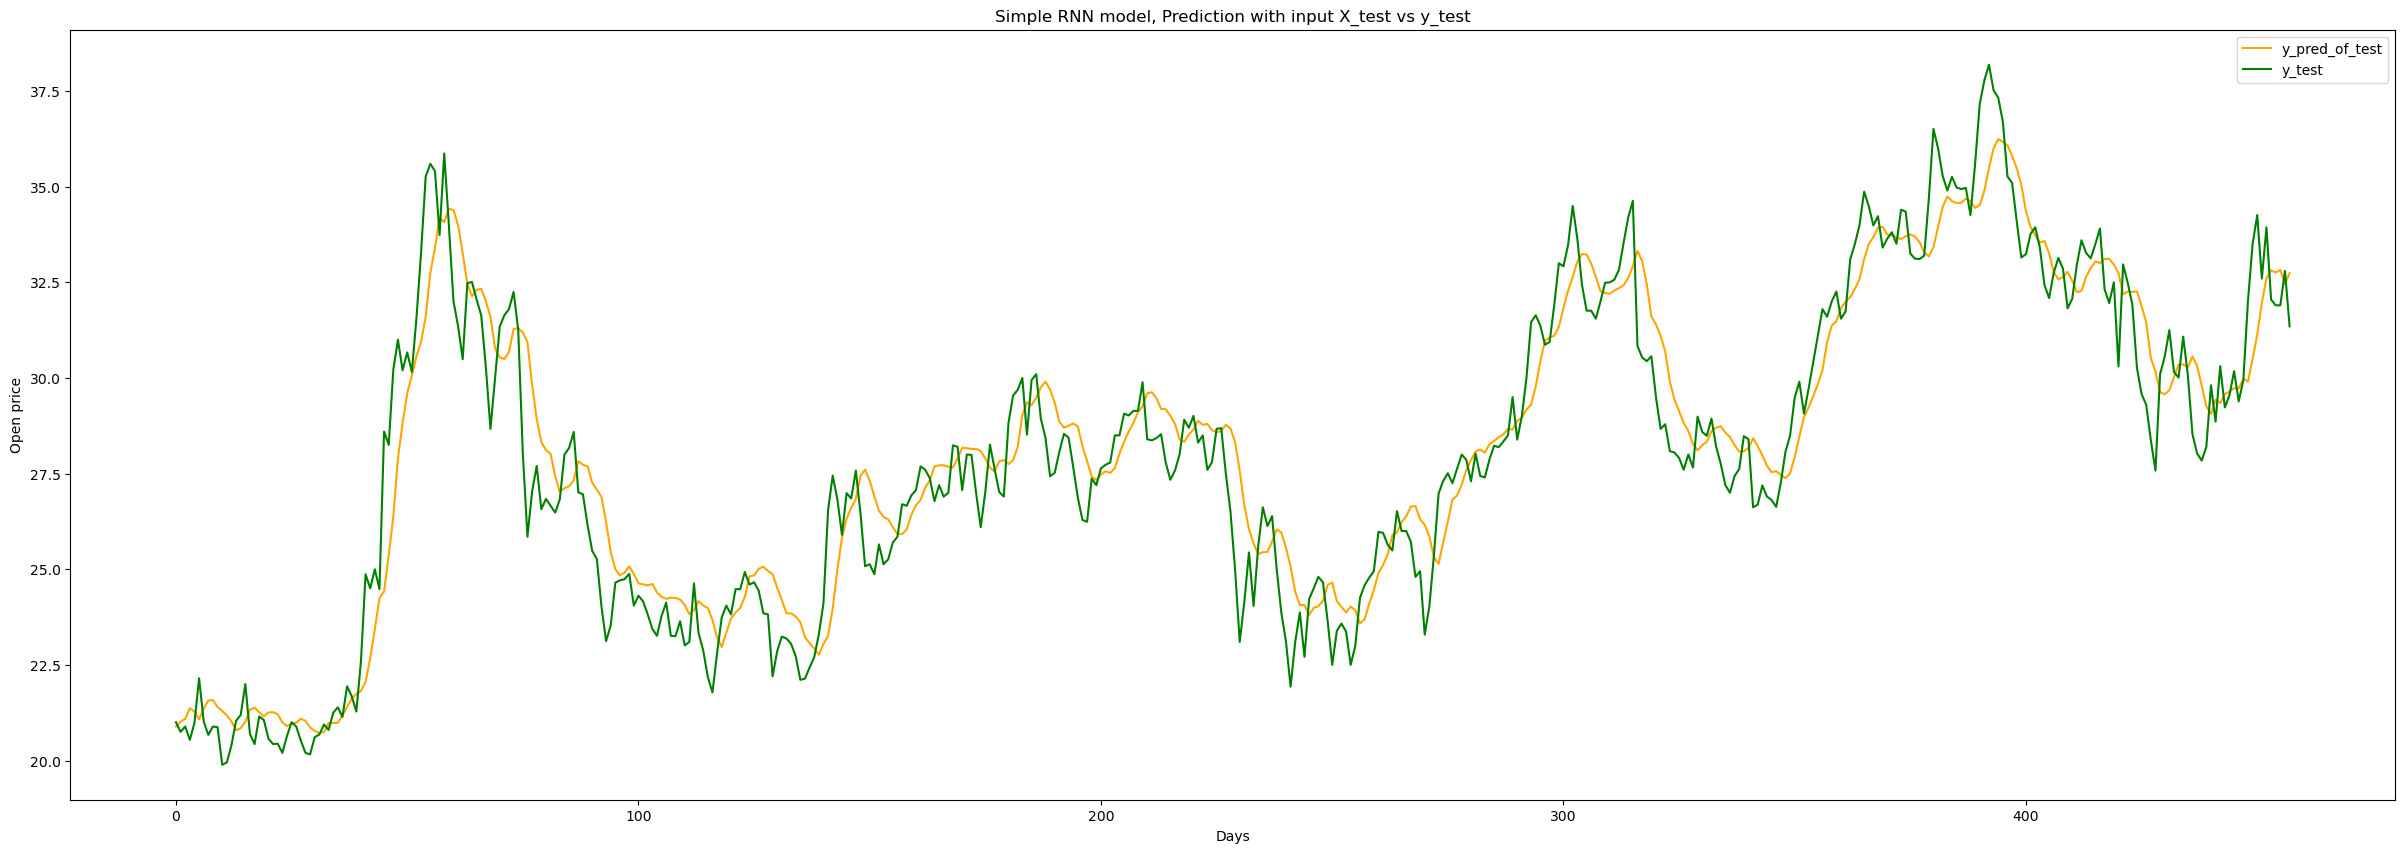

In [142]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_new), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [145]:
test_data.shape

(508, 1)

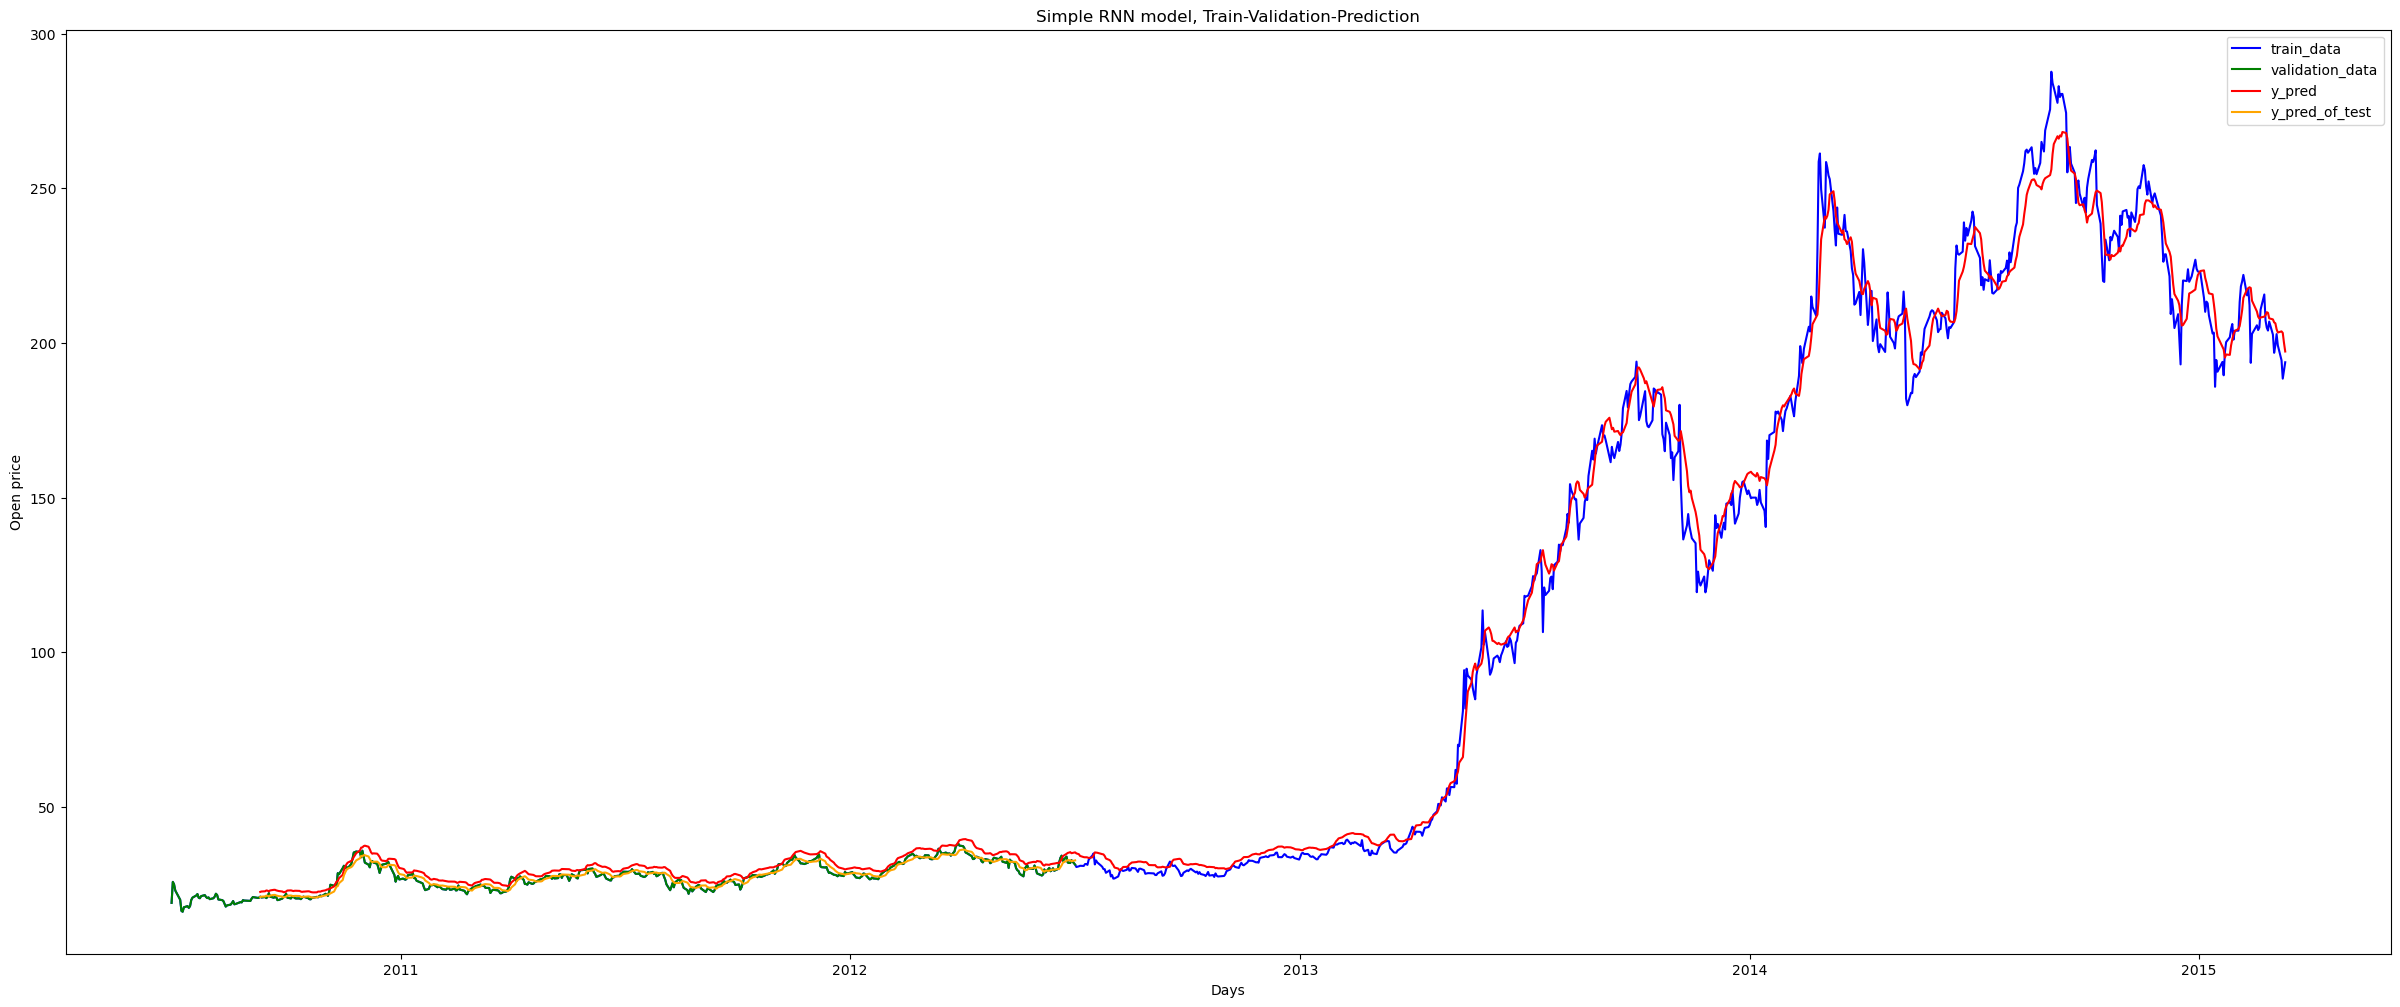

In [147]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(test_data.Date, test_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(test_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()